In [1]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

ImportError: No module named 'se2waveload'

In [2]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    
    

In [3]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [4]:
FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210129-Tilting/"

SigmoidFile = LoadPickleFile(FolderSigmoidPath, "20210118-T2-50x50-P3-100.05")
TiltedFile = LoadPickleFile(Filename = "TPList_t4090_d100.05.pickle",FolderPath = FolderTiltedPath)

In [5]:

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.scientific.sequential import Oslo_3

cmap = ListedColormap(Oslo_3.mpl_colors[:])

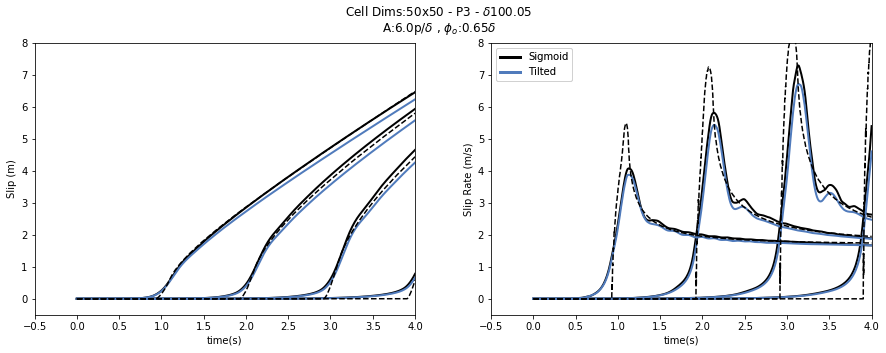

In [6]:
fig, axis = GenericFigAxis()

# Sigmoid case plotting
iidx = 0
for Test1 in SigmoidFile:
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


# Tilted case plotting
iidx = 1
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
    
LabelsPerColor= ["Sigmoid", "Tilted"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Cell Dims:50x50 - P3 - $\delta$100.05 \nA:6.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

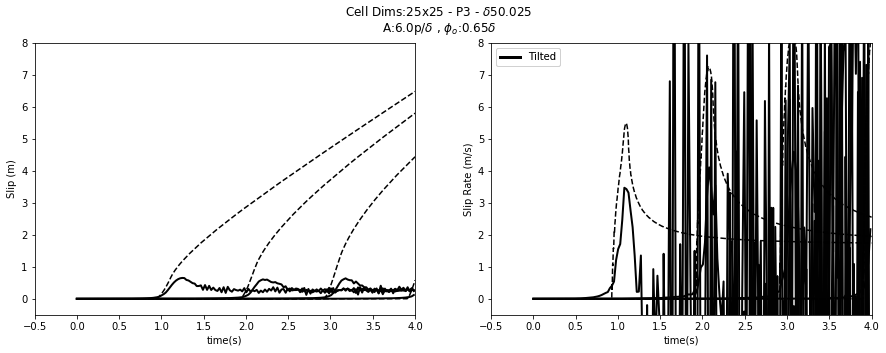

In [7]:
fig, axis = GenericFigAxis()

FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210201-Tilting/"

TiltedFile = LoadPickleFile(Filename = "TPList_t8180_d50.025.pickle",FolderPath = FolderTiltedPath)

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
    
LabelsPerColor= ["Tilted"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Cell Dims:25x25 - P3 - $\delta$50.025 \nA:6.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

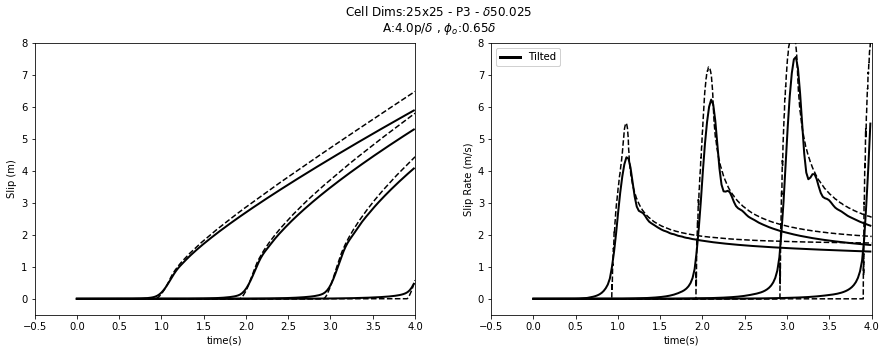

In [9]:
fig, axis = GenericFigAxis()

FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210203-Tilting/"

TiltedFile = LoadPickleFile(Filename = "TPList_t8180_d50.025.pickle",FolderPath = FolderTiltedPath)

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
    
LabelsPerColor= ["Tilted"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Cell Dims:25x25 - P3 - $\delta$50.025 \nA:4.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

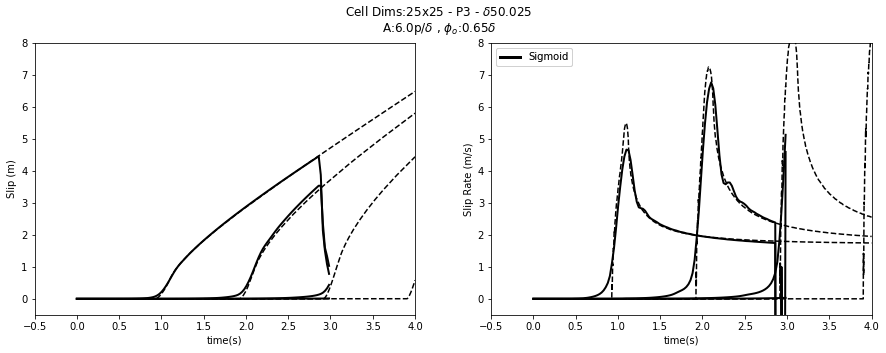

In [15]:
fig, axis = GenericFigAxis()

FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"
SigmoidFile = LoadPickleFile(FolderSigmoidPath, "20210209-T1-25x25-P3-50.025")

# Tilted case plotting
iidx = 0
for Test1 in SigmoidFile:
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
LabelsPerColor= ["Sigmoid"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Cell Dims:25x25 - P3 - $\delta$50.025 \nA:6.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]